<a href="https://colab.research.google.com/github/aleshweta/DataAnalytics/blob/main/S_Ale_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Attribute Analyis of Diabetes dataset
Throughout this chapter we'll mostly be using a dataset from the UCI repository,"Pima Indian diabetes", which has 768records, 8 attributes, 2 classes, 268(34.9%) positive results for a diabetes test, and 500(65.1%) negative results. All patients were females at least 21 years old of Pima Indian heritage.

Attributes of the dataset:

1) Number of times pregnant

2) Plasma glucose concentration at 2 hours in an oral glucose tolerance test

3) Diastolic blood pressure(mmHg)

4) Triceps skin fold thickness(mm)

5) 2-Hour serum insulin(mu U/ml)

6) Body mass index(weight in kg/(height in m)^2)

7) Diabetes pedigree function 

8) Age(years)

##Data Summary



*   Pregnancies: Number of times of pregnant.

*   Glucose: Plasma glucose concentration at 2 hours in an oral glucose tolerance test

*   BloodPressure: The diastolic blood pressure, measures the pressure in your arteries when your heart rests between beats.
*   SkinThickness: Skinfold thickness (SFT) measurement is a reliable, cheap, simple, noninvasive method of body fat estimation at all ages including the newborn period [link](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5817819/). We using triceps skin fold thickness which is value used to estimate body fat, measured on the right arm halfway between the olecranon process of the elbow and the acromial process of the scapula.
*   Insulin: Insulin is a hormone that lowers the level of glucose (a type of sugar) in the blood. This 2 hour Glucose Tolerance Test with Insulin levels is used to assess how an individual processes glucose and how the insulin in the body responds to those glucose levels[link](https://www.healthtestingcenters.com/test/glucose-tolerance-test-insulin-2-hour/).
*   BMI: Body mass index.

*   DiabetesPedigreeFunction:It indicates the function which scores likelihood of diabetes based on family history.
*   Age: Age of female atleast 21 years old.
*   Outcome: Positve(have diabetes) or Negative.





## EDA

In [66]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from patsy import dmatrices
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split

df = pd.read_csv("https://raw.githubusercontent.com/aleshweta/DataAnalytics/main/diabetes.csv")
df_orginal = df.copy()
print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [46]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.032200,0.013738,0.065535,0.135196,-0.150693,-0.046093,-0.137728,-0.013135,0.309375
std,1.007930,0.958784,1.061257,1.080149,1.051444,1.009755,0.956012,1.010456,0.866348
min,-2.766652,-2.686996,-2.138208,-2.836391,-3.126259,-2.577518,-2.475632,-2.376421,-1.469409
25%,-0.627223,-0.649153,-0.618900,-0.530198,-0.703947,-0.608260,-0.817858,-0.621287,-0.365953
50%,0.026986,0.000503,0.059116,0.177259,-0.154579,-0.109931,-0.145406,0.134772,0.285196
75%,0.800863,0.791105,0.571720,0.791922,0.470215,0.502356,0.576402,0.652118,0.788817
max,2.207978,1.862385,3.391167,2.596564,2.187490,3.802587,2.218145,2.171799,2.367446


As any of the give attributes of the dataset except for Outcomes can't be 0 so, we will replace the 0 value by nan.

In [107]:
df['Pregnancies'].replace(0, np.nan,inplace = True)
df['Insulin'].replace(0, np.nan,inplace = True)
df['Glucose'].replace(0, np.nan,inplace = True)
df['BloodPressure'].replace(0, np.nan,inplace = True)
df['SkinThickness'].replace(0, np.nan,inplace = True)
df['BMI'].replace(0, np.nan,inplace = True)
df['DiabetesPedigreeFunction'].replace(0, np.nan,inplace = True)
df['Age'].replace(0, np.nan,inplace = True)

In [109]:
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0      NaN  33.6   
1            1.0     85.0           66.0           29.0      NaN  26.6   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            NaN    137.0           40.0           35.0    168.0  43.1   
6            3.0     78.0           50.0           32.0     88.0  31.0   
..           ...      ...            ...            ...      ...   ...   
761          9.0    170.0           74.0           31.0      NaN  44.0   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0      NaN  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
767          1.0     93.0           70.0           31.0      NaN  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [69]:
#check for nulls
df.isnull().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                       0
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

We see lot of missing vlaues for SkinThickness, BloodPressure, and BMI so we will just drop them. 

In [73]:
df.dropna(axis = 0 , inplace=True)
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [74]:
df.nunique()

Pregnancies                  17
Glucose                     126
BloodPressure                42
SkinThickness                50
Insulin                     185
BMI                         222
DiabetesPedigreeFunction    413
Age                          46
Outcome                       2
dtype: int64

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               532 non-null    int64  
 1   Glucose                   532 non-null    float64
 2   BloodPressure             532 non-null    float64
 3   SkinThickness             532 non-null    float64
 4   Insulin                   532 non-null    int64  
 5   BMI                       532 non-null    float64
 6   DiabetesPedigreeFunction  532 non-null    float64
 7   Age                       532 non-null    int64  
 8   Outcome                   532 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 41.6 KB


In [31]:
# Correlation Map 
corr = df.corr()
round(corr,2)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
SkinThickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
Insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
Age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
Outcome,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


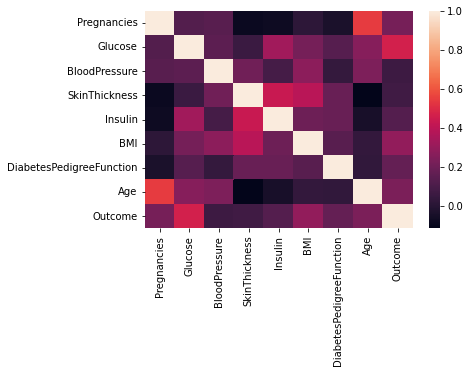

In [32]:
#correlation using seborn heatmap
sns.heatmap(corr)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f81ead587d0>,
      dtype=object)

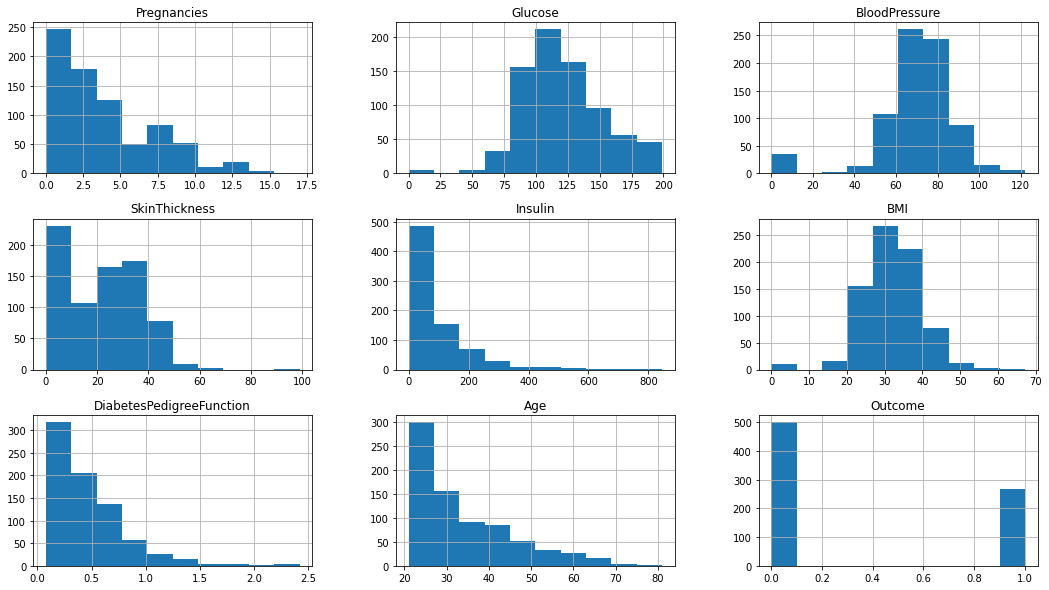

In [33]:
#histogram
import matplotlib as plt

df.hist(bins=10, figsize = (18,10))


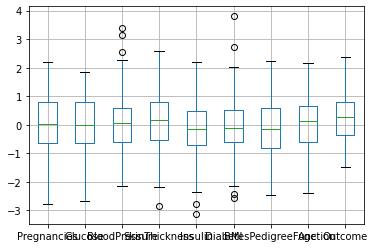

In [34]:
import numpy as np
numericDataColumns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']

df = pd.DataFrame(np.random.randn(100, 9), columns=numericDataColumns)
boxplot = df.boxplot(column=numericDataColumns)  


We see large outliers between outcome but its not really outliers because our outcomes lies between 1(yes) or 0(no) only.


We use grouby Outcome to show different attributes values based pregnant and non pregnant women.

In [35]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
-1.469409,0.141539,-0.333630,-1.248998,-1.882621,0.002179,-1.052597,-1.570471,0.569839
-1.357024,-0.018344,0.268804,-0.900798,0.538755,0.270635,-0.209451,1.717909,0.150509
-1.273981,-1.407096,-0.270335,-1.015913,0.031187,-0.599690,-0.289116,0.072032,-1.971461
-1.252608,-0.106079,0.341675,-1.187056,-0.534723,0.091999,-0.371863,-0.106195,0.423170
-1.008940,-0.721780,-1.122462,0.560378,1.356151,1.783242,-0.293876,-0.120246,0.542788
...,...,...,...,...,...,...,...,...
1.890768,-1.076667,-2.686996,-0.105489,1.534750,0.222811,-1.160085,-0.239642,0.901087
1.975718,0.175690,-0.342913,-2.138208,1.707649,-0.872769,-0.633720,-0.207806,-0.336820
2.086970,0.248130,0.875036,-1.122971,-1.188873,0.538176,-2.441921,-0.809925,0.525534


We use grouby Age to show different attributes values based on age of women.

In [36]:
df.groupby('Age').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
Age,,,,,,,,
-2.376421,0.707626,-0.678857,-0.355396,0.064301,0.382451,1.197456,-0.563499,1.364884
-2.243941,0.146580,-1.198651,0.451363,0.347581,-0.439066,-0.768815,1.011394,0.959574
-2.192256,1.399380,0.629548,0.497639,0.607479,-0.666847,1.565029,0.815310,0.969287
-2.159283,-0.069335,1.170217,0.074444,0.605854,-0.103842,-0.700085,0.388708,-0.239670
-1.976119,-0.094710,0.272586,0.442432,0.456140,0.731646,3.802587,0.046018,-0.993285
...,...,...,...,...,...,...,...,...
1.810464,-0.639613,0.080119,-0.424896,0.835353,-0.116876,0.379227,0.166069,-0.044226
1.846195,-1.876737,1.238225,-0.188613,1.072860,1.105956,-1.516254,-0.173678,1.678299
1.898556,0.497174,0.786131,-0.527358,1.843114,1.902702,0.173188,-0.107702,0.319646


## Basic Feature Engineering


In [104]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
df_features= df.drop('Outcome', axis = 1)
df_label = df[['Outcome']]

df_features.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,0,33.6,0.627,50
1,1,85.0,66.0,29.0,0,26.6,0.351,31
3,1,89.0,66.0,23.0,94,28.1,0.167,21
4,0,137.0,40.0,35.0,168,43.1,2.288,33
6,3,78.0,50.0,32.0,88,31.0,0.248,26


In [85]:
imp = IterativeImputer(max_iter= 10000, random_state=0)
imp.fit(df_features)


IterativeImputer(max_iter=10000, random_state=0)

In [102]:
df_feature_arr = imp.transform(df_features)
df_feature_arr.shape
df_features = pd.DataFrame(df_feature_arr, columns = df_features.columns)


df_feature_arr

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  1.   ,  89.   ,  66.   , ...,  28.1  ,   0.167,  21.   ],
       ...,
       [  2.   , 122.   ,  70.   , ...,  36.8  ,   0.34 ,  27.   ],
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [99]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
rescaled_features = scaler.fit_transform(df_feature_arr)
#rescaled_features = rescaled_features.reshape(-1, 1)
print(rescaled_features)

[[0.35294118 0.64335664 0.55813953 ... 0.31492843 0.23211991 0.48333333]
 [0.05882353 0.2027972  0.48837209 ... 0.17177914 0.11391863 0.16666667]
 [0.05882353 0.23076923 0.48837209 ... 0.20245399 0.03511777 0.        ]
 ...
 [0.11764706 0.46153846 0.53488372 ... 0.3803681  0.10920771 0.1       ]
 [0.29411765 0.45454545 0.55813953 ... 0.16359918 0.06852248 0.15      ]
 [0.05882353 0.25874126 0.53488372 ... 0.24948875 0.09850107 0.03333333]]


In [101]:
#testing our MinMaxScale
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

def build_model(X,Y, test_frac):
  x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = test_frac)

  model = LogisticRegression(solver = 'liblinear').fit(x_train, y_train)
  y_pred = model.predict(x_test)

  print("Test_score: ", accuracy_score(y_test, y_pred))

build_model(rescaled_features, df_feature_arr, 0.2)


ValueError: ignored

In [105]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

ValueError: ignored

## Confusion matrix
To reduce flase positives and false negatives we will look at accuracy, precision, recall and f1 score.

In [ ]:
#scores
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, pos_label='positive', average='micro')
precision = precision_score(y_test, y_pred, pos_label='positive', average='micro')
f1 = f1_score(y_test, y_pred, pos_label='positive', average='micro')


In [ ]:
from numpy.random.mtrand import f
#Own code for metrics

def confusion_matrix_values(y_pred, y_test):
  tp = ((y_test == 1) & (y_test == y_pred)).sum()
  tn = ((y_test == 0) & (y_test == y_pred)).sum()
  fp = ((y_test == 0) & (y_test != y_pred)).sum()
  fn = ((y_test == 1) & (y_test != y_pred)).sum()
  return tp, tn, fp, fn

def f_accuracy(actual, pred):
  tp, tn, fp, fn = confusion_matrix_values(y_pred, y_test)
  val = (tp + tn) / (tp + tn + fp + fn)
  return val

def f_recall(y_pred, y_test):
   tp, tn, fp, fn = confusion_matrix_values(y_pred, y_test)
   val = (tp) / (tp + fn)
   return val

def f_precision(y_pred, y_test):
   tp, tn, fp, fn = confusion_matrix_values(y_pred, y_test)
   val = (tp) / (tp + fp)
   return val
def f_specificity(y_pred, y_test):
   tp, tn, fp, fn = confusion_matrix_values(y_pred, y_test)
   val = (tn) / (tn + fp)
   return val
def f_f1(y_pred, y_test):
   tp, tn, fp, fn = confusion_matrix_values(y_pred, y_test)
   pre = (tp) / (tp + fp)
   rec = (tp) / (tp + fn)
   val = (2 * pre*rec)/ (pre+rec)
   return val

def get_stats(x,y):
  acc = f_accuracy(x,y)
  rec = f_recall(x,y)
  pre = f_precision(x,y)
  spe = f_specificity(x,y)
  f1 = f_f1(x,y)
  return acc, rec, pre, spe, f1

a,b,c,d,e = get_stats(y_pred, y_test)

#output

print("Accuracy:\n", a,"\n", accuracy)
print("Recall:\n", b,"\n", recall)
print("Precision:\n", c,"\n", precision)
print("Specificity:\n", d)
print("f1:\n", e,"\n", f1)




